In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn. metrics import roc_curve, auc
import random
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay
from sklearn. metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [2]:
def calculate_metrics(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)
    predictive_accuracy = (tp + tn) / (tp + tn + fp + fn)
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return sensitivity, specificity, ppv, npv, predictive_accuracy, mccnomogram

In [3]:
data = pd.read_excel("C:\\Users\\12292\\Documents\\nomogram.xlsx")

In [4]:
train_X = data.iloc[:, 1:]  # Features (excluding the first column)
train_y = data.iloc[:, 0] 

In [5]:
train_X

,BNF,phases,Radscore,nomogram
0,1.260731,4,0.446201,0.931786
1,1.385450,9,2.553235,5.756232
2,1.410795,0,-1.116113,-2.261907
3,0.930106,0,-1.127136,-3.283607
4,1.066182,0,-1.669537,-3.619928
...,...,...,...,...
328,1.266495,1,-0.748227,-1.713666
329,1.018247,1,-1.270338,-2.833492
330,0.658511,5,0.754189,0.450075
331,1.007611,6,-0.795665,-0.165012


In [6]:
train_R = data.iloc[:,3]  # Features (excluding the first column)

In [7]:
train_R

0      0.446201
1      2.553235
2     -1.116113
3     -1.127136
4     -1.669537
         ...   
328   -0.748227
329   -1.270338
330    0.754189
331   -0.795665
332    0.604769
Name: Radscore, Length: 333, dtype: float64

In [8]:
train_y 

0      1
1      1
2      0
3      0
4      0
      ..
328    0
329    0
330    1
331    0
332    1
Name: status, Length: 333, dtype: int64

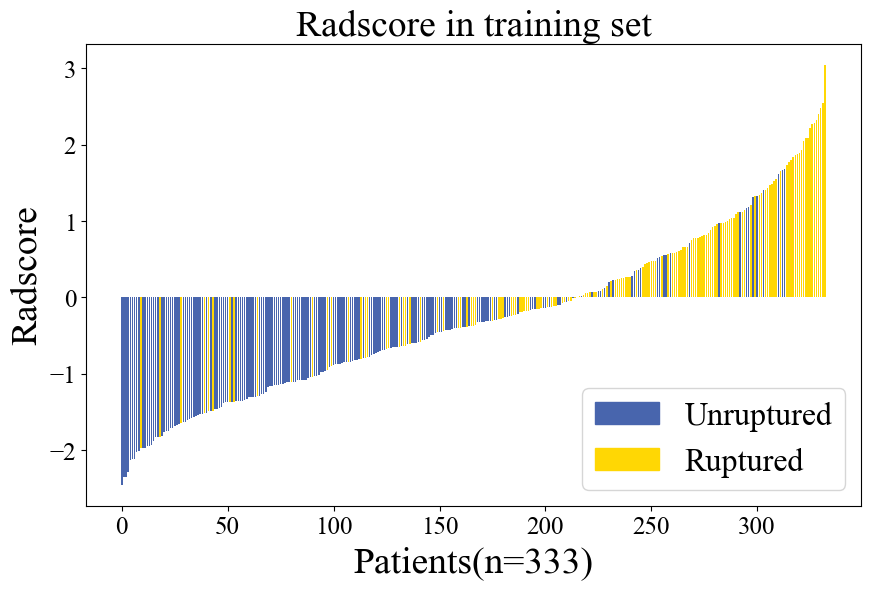

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Times New Roman，大小为 17
plt.rcParams.update({'font.family': 'serif', 'font.serif': ['Times New Roman'], 'font.size': 17})

combined_data = list(zip(train_R, train_y))

# 按照 train_R 的值进行排序
grouped_data = sorted(combined_data, key=lambda x: x[0])

# 分组后的 train_R 值
grouped_train_R = [data[0] for data in grouped_data]

# 分组后的 train_y 值
grouped_train_y = [data[1] for data in grouped_data]
color_map = {0: '#4865AD', 1: '#ffd704'}
# 绘制条形图
plt.figure(figsize=(10, 6))
bars = plt.bar(np.arange(len(grouped_train_R)), grouped_train_R, color=[color_map[y] for y in grouped_train_y], width=0.7)  # 调整 width 参数来改变线条宽度
# 添加图例
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color_map[i]) for i in color_map], 
           labels=['Unruptured', 'Ruptured'],
           loc='lower right',
           fontsize=23)
plt.title('Radscore in training set', fontsize=27)
plt.xlabel('Patients(n=333)', fontsize=27)
plt.ylabel('Radscore', fontsize=27)
# 设置 x 轴和 y 轴刻度标签的大小
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#plt.savefig('radscore_plot.pdf', format='pdf') 
plt.show()



In [10]:
train_N = data.iloc[:,4]  

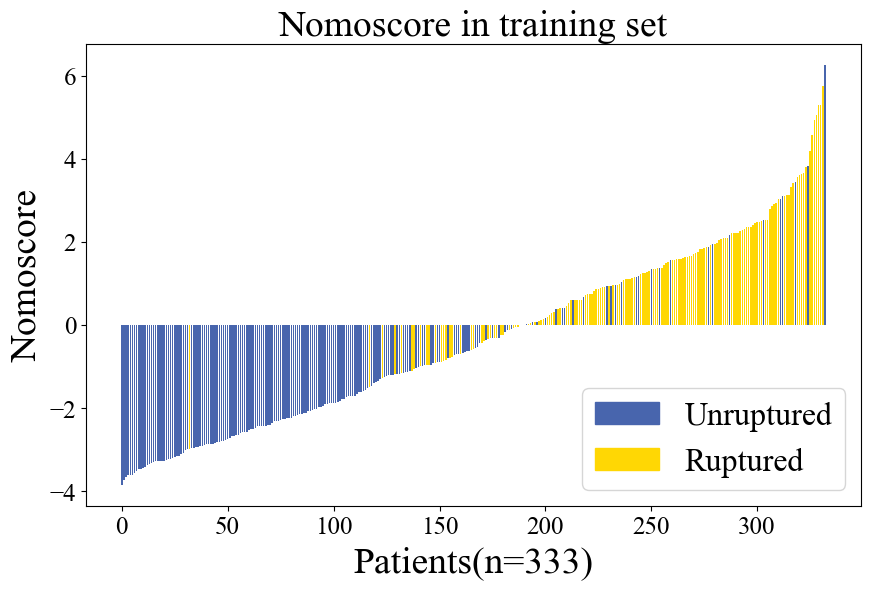

In [11]:
combined_data = list(zip(train_N , train_y))
# 按照train_R的值进行排序
# 设置全局字体为 Type 1 的 Times New Roman，大小为 17
plt.rcParams.update({'font.family': 'serif', 'font.serif': ['Times New Roman'], 'font.size': 17})
grouped_data = sorted(combined_data, key=lambda x: x[0])  # 根据train_R值进行排序
# 分组后的train_R值
grouped_train_N  = [data[0] for data in grouped_data]

# 分组后的train_y值
grouped_train_y = [data[1] for data in grouped_data]

# 创建颜色映射字典
color_map = {0: '#4865AD', 1: '#ffd704'}

plt.figure(figsize=(10, 6))
bars = plt.bar(np.arange(len(grouped_train_N)), grouped_train_N, color=[color_map[y] for y in grouped_train_y], width=0.7) 

# 添加图例
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color_map[i]) for i in color_map], 
           labels=['Unruptured', 'Ruptured'],
           loc='lower right',
           fontsize=23)
# 添加标题和标签
plt.title('Nomoscore in training set', fontsize=27)
plt.xlabel('Patients(n=333)', fontsize=27)
plt.ylabel('Nomoscore', fontsize=27)
# 显示图形
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.savefig('nomoscore_plot.pdf', format='pdf') 
plt.show()

In [12]:
data_test = pd.read_excel("C:\\Users\\12292\\Documents\\nomogram test.xlsx")

In [13]:
test_y = data_test.iloc[:, 0] 

In [14]:
test_y

0      0
1      0
2      1
3      1
4      0
      ..
137    1
138    0
139    0
140    1
141    1
Name: status, Length: 142, dtype: int64

In [15]:
test_X = data_test.iloc[:, 1:] 
test_X

,BNF,phases,Radscore,nomogram
0,1.171501,0,-1.330076,-3.009583
1,1.548727,3,-0.510796,0.009658
2,1.020419,5,-0.500976,-0.229506
3,1.050066,5,-0.027945,0.375154
4,1.505123,5,-1.491680,-0.348055
...,...,...,...,...
137,1.208578,5,-1.083666,-0.502693
138,1.073510,1,-0.901801,-2.294884
139,1.062127,5,-0.661546,-0.326078
140,1.059717,5,0.152209,0.601995


In [16]:
test_R = data_test.iloc[:,3]  

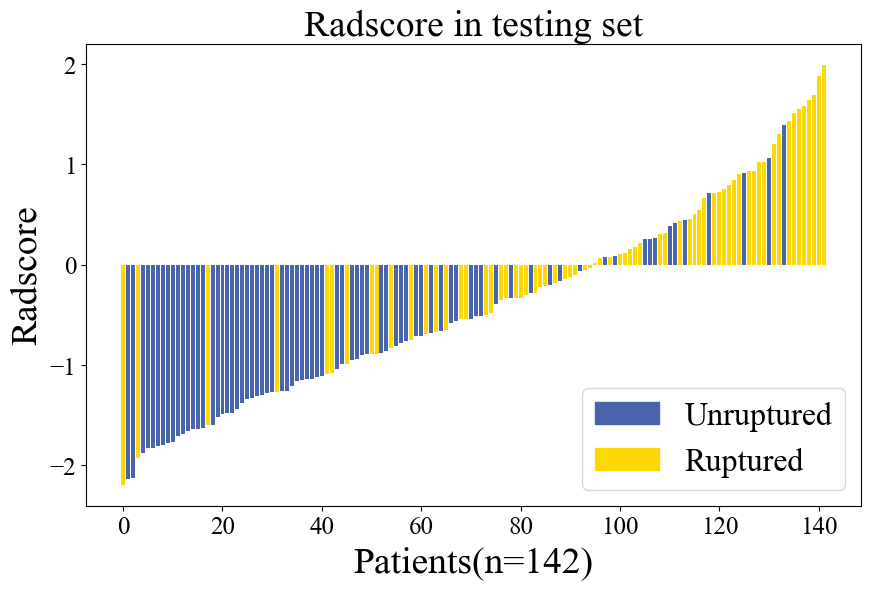

In [17]:
combined_data = list(zip(test_R, test_y))
# 设置全局字体为 Type 1 的 Times New Roman，大小为 17
plt.rcParams.update({'font.family': 'serif', 'font.serif': ['Times New Roman'], 'font.size': 17})
grouped_data = sorted(combined_data, key=lambda x: x[0])  # 根据train_R值进行排序

# 分组后的train_R值
grouped_test_R = [data[0] for data in grouped_data]

# 分组后的train_y值
grouped_test_y = [data[1] for data in grouped_data]

# 创建颜色映射字典
color_map = {0: '#4865AD', 1: '#ffd704'}
# plot
plt.figure(figsize=(10, 6))
bars = plt.bar(np.arange(len(grouped_test_R)), grouped_test_R, color=[color_map[y] for y in grouped_test_y])

# legend
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color_map[i]) for i in color_map], 
           labels=['Unruptured', 'Ruptured'],
           loc='lower right',
           fontsize=23)
plt.title('Radscore in testing set', fontsize=27)
plt.xlabel('Patients(n=142)', fontsize=27)
plt.ylabel('Radscore',fontsize=27)
# figure
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.savefig('radscore_plot1.pdf', format='pdf') 
plt.show()

In [18]:
test_N = data_test.iloc[:,4]  

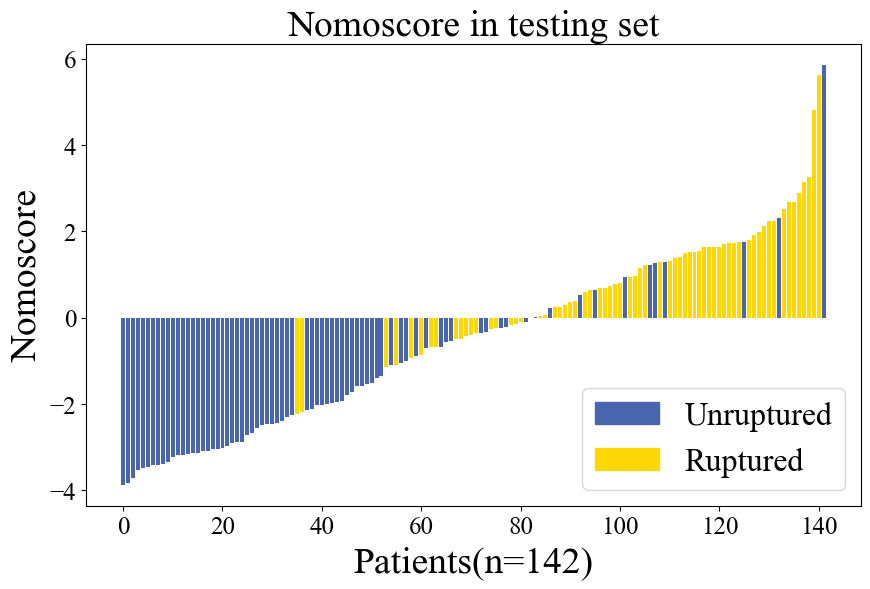

In [19]:
combined_data = list(zip(test_N, test_y))


plt.rcParams.update({'font.family': 'serif', 'font.serif': ['Times New Roman'], 'font.size': 17})

grouped_data = sorted(combined_data, key=lambda x: x[0])  # 根据train_R值进行排序

# 分组后的train_R值
grouped_test_N = [data[0] for data in grouped_data]

# 分组后的train_y值
grouped_test_y = [data[1] for data in grouped_data]

color_map = {0: '#4865AD', 1: '#ffd704'}
plt.figure(figsize=(10, 6))
bars = plt.bar(np.arange(len(grouped_test_N)), grouped_test_N, color=[color_map[y] for y in grouped_test_y])
# 添加图例
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color_map[i]) for i in color_map], 
           labels=['Unruptured', 'Ruptured'],
           loc='lower right',
           fontsize=23)
plt.title('Nomoscore in testing set',fontsize=27)
plt.xlabel('Patients(n=142)',fontsize=27)
plt.ylabel('Nomoscore',fontsize=27)
# 显示图形
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.savefig('nomoscore_plot1.pdf', format='pdf') 
plt.show()

In [1]:
import sklearn
import numpy
import pandas

print("Scikit-learn version:", sklearn.__version__)
print("NumPy version:", numpy.__version__)
print("Pandas version:", pandas.__version__)


Scikit-learn version: 1.3.2
NumPy version: 1.24.3
Pandas version: 2.0.3
